In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict,  cross_val_score

In [2]:
train=pd.read_csv(r"H:\M.tech Data science PDPU\PRML LAB\CSV\mnist_train.csv",sep=",")
test=pd.read_csv(r"H:\M.tech Data science PDPU\PRML LAB\CSV\mnist_test.csv",sep=",")

(1) Load Dataset

In [3]:
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(2) Visualise Data

In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


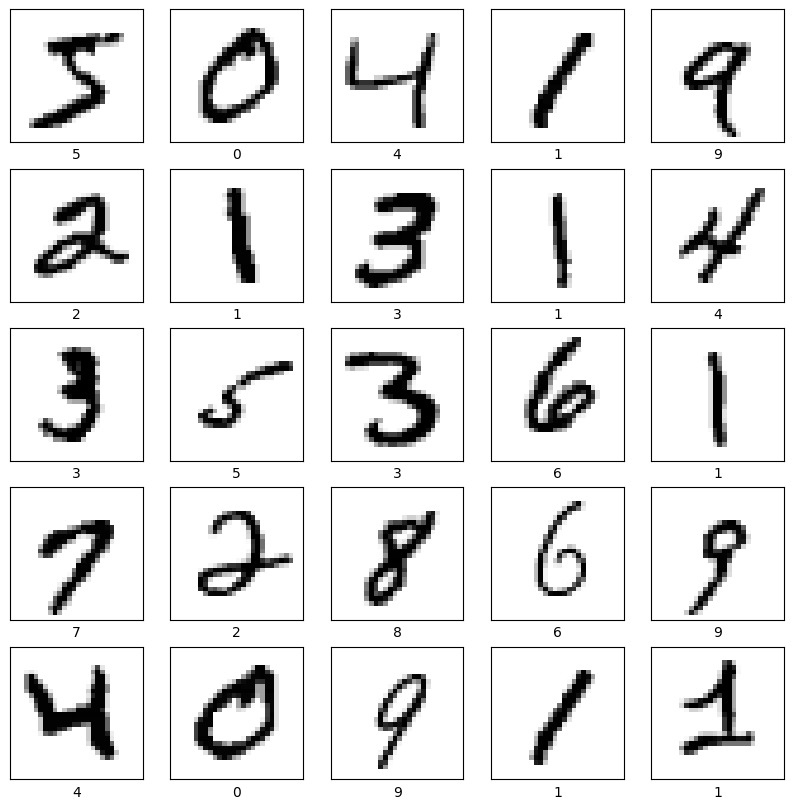

In [6]:
from tensorflow.keras.datasets import mnist  # You can use TensorFlow/Keras to load MNIST

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Visualize the data
plt.figure(figsize=(10, 10))  # Set the figure size for the plots

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

plt.show()

In [7]:
y_train = train["label"]
X_train = train.drop(columns=["label"])
y_test = test["label"]
X_test = test.drop(columns=["label"])


(3) check class imbalance

In [8]:
train.label.value_counts()

label
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

In [9]:
value_counts = train['label'].value_counts()
total_count = len(train)
percentages = (value_counts / total_count) * 100
result_df = pd.DataFrame({'Value Counts': value_counts, 'Percentages (%)': percentages})
result_df

,Value Counts,Percentages (%)
label,,
1,6742,11.236667
7,6265,10.441667
3,6131,10.218333
2,5958,9.930000
9,5949,9.915000
0,5923,9.871667
6,5918,9.863333
8,5851,9.751667
4,5842,9.736667


In [10]:
test.label.value_counts()

label
1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: count, dtype: int64

In [11]:
value_counts = test['label'].value_counts()
total_count = len(test)
percentages = (value_counts / total_count) * 100
result_dft = pd.DataFrame({'Value Counts': value_counts, 'Percentages (%)': percentages})
result_dft

,Value Counts,Percentages (%)
label,,
1,1135,11.35
2,1032,10.32
7,1028,10.28
3,1010,10.10
9,1009,10.09
4,982,9.82
0,980,9.80
8,974,9.74
6,958,9.58


Data set is bit Imbalanced

(4) Compare Leave one out , 2,3,5 and 10 cross validation folds




Declaring KNN as 5 (nearest neighbour)

In [12]:
KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(X_train, y_train)

KNeighborsClassifier()

For 2 folds accuracy

In [13]:
CV_2 = cross_val_predict(KNN, X_train, y_train, cv=2)
CV_2

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [14]:
accuracies_2 = cross_val_score(KNN, X_train, y_train, cv=2, scoring='accuracy').mean()
accuracies_2

0.96365

For 3 folds accuracy

In [15]:
CV_3= cross_val_predict(KNN, X_train, y_train, cv=3)
CV_3

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [16]:
accuracies = cross_val_score(KNN, X_train, y_train, cv=3, scoring='accuracy').mean()
accuracies

0.9674166666666667

For 5 folds accuracy

In [17]:
CV_5 = cross_val_predict(KNN, X_train, y_train, cv=5)
CV_5

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [18]:
accuracies_5 = cross_val_score(KNN, X_train, y_train, cv=5, scoring='accuracy').mean()
accuracies_5

0.9692833333333335

For 10 folds accuracy

In [19]:
CV_10 = cross_val_predict(KNN, X_train, y_train, cv=10)
CV_10

array([5, 0, 4, ..., 5, 6, 8], dtype=int64)

In [20]:
accuracies_10 = cross_val_score(KNN, X_train, y_train, cv=10, scoring='accuracy').mean()
accuracies_10

0.9700499999999999

For Leave one out Cross validation fold accuracy / Ideally Leave-One-Out Cross Validation should not be used here due to large amount of data (70000 X 785) the computational time is very high as it assumes each entry as one fold and compares to rest of entries.

In [21]:
# from sklearn.model_selection import LeaveOneOut

# loo = LeaveOneOut()
# loo_scores = cross_val_score(KNN,X_train, y_train, cv=loo, scoring='accuracy')
# mean_loo_accuracy = loo_scores.mean()

(5)  Observe the pattern as the number of folds increases

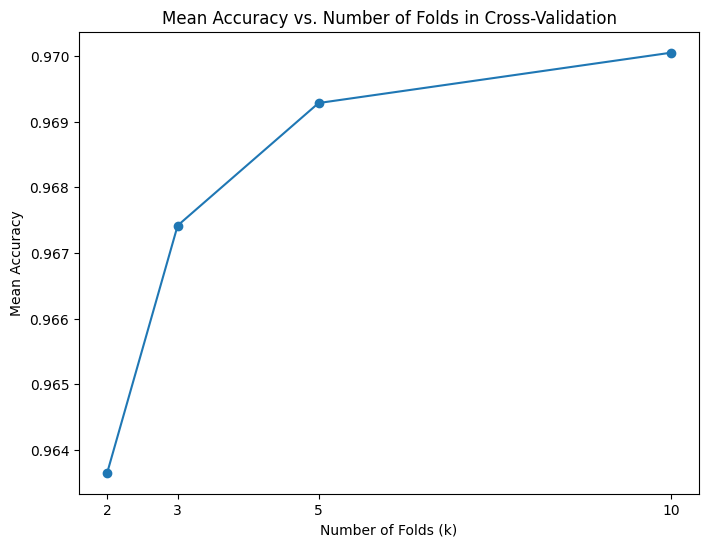

In [22]:
k_values = [2, 3, 5, 10]
mean_accuracies =[0.96365,0.9674166666666667,0.9692833333333335,0.9700499999999999]
plt.figure(figsize=(8, 6))
plt.plot(k_values, mean_accuracies,marker="o")
plt.xlabel('Number of Folds (k)')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy vs. Number of Folds in Cross-Validation')
plt.xticks(k_values)
plt.show()

(6) Identify the best K value (here we use elbow knn)

In [ ]:
k_values = range(1, 21)
accuracy_scores = []
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    accuracy = knn_classifier.score(X_test, y_test)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Best K value')
plt.show()

According to graph best K should be 3 , although any k would give similar / nearby values the best to pick would be 3 to reduce computational time here

(7) Compare values with and without the class imbalance checking

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test, y_test)

After Applying Smote we further balance the data set

In [ ]:
X_train_resampled

In [ ]:
X_test_resampled

6 crore elements for test and train combined


In [ ]:
CV_2_Balanced = cross_val_score(KNN, X_train_resampled, y_train_resampled, cv=2, scoring='accuracy').mean()
CV_2_Balanced


In [ ]:
CV_3_Balanced = cross_val_score(KNN, X_train_resampled, y_train_resampled, cv=3, scoring='accuracy').mean()
CV_3_Balanced


In [ ]:
CV_5_Balanced = cross_val_score(KNN, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy').mean()
CV_5_Balanced


In [ ]:
CV_10_Balanced = cross_val_score(KNN, X_train_resampled, y_train_resampled, cv=10, scoring='accuracy').mean()
CV_10_Balanced


In [ ]:
k_values = range(1, 21)
accuracy_scores = []
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_resampled, y_train_resampled)
    accuracy = knn_classifier.score(X_test_resampled, y_test_resampled)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Best K value')
plt.show()



The difference between Imbalanced data set and Balanced data set is very minute , it being around 0.004 for cross validation 2 folds suggests that we can carry out operations here without balancing as the accuracy increases is almost negligible .